# **프로젝트 주제 : 심장질환 예측**

### **프로젝트 요약** 

**사용 자료**  
심장 질환 예측 데이터셋 (Kaggle 제공, 환자 데이터 1025개)  
**사용 알고리즘**  
랜덤 포레스트(Random Forest) 알고리즘  
선정 이유: 높은 예측 성능, 비선형 관계 학습 가능, 과적합 방지 능력  
**정확도**  
훈련 데이터 정확도: 99.51% , 테스트 데이터 정확도: 97.56%, 재현율(Recall): 95.14%, F1 점수(F1 Score): 97.51%  
**목표**  
환자의 건강 정보를 기반으로 심장 질환 여부를 예측

### **데이터셋 설명** 

**데이터셋 : 심장 질환 예측 데이터셋**  
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

**총 데이터 크기**  
행은 1025개(환자 수), 열은 14개(특징+타겟변수)

**타겟변수**  
target은 심장 질환 여부를 나타냄 (머신러닝 모델이 예측하려는 값)  
1:심장 질환 있음  
0:심장 질환 없음

**특징(입력값)**  
데이터셋의 각 열은 환자의 건강상태와 관련된 특정 변수  
심장 질환 여부를 예측하기 위해 사용되는 환자의 건강 정보
데이터셋에서 타겟변수를 예측하는 데 필요한 독립 변수

|**변수명**|설명|값의 유형|
|:---|:---:|---:
|age|나이|연속형|||sex|성별|범주형 (1: 남성, 0: 여성)|
|cp|흉통 유형|범주형 (0~3)|
|trestbps|안정 시 혈압 (단위: mm Hg)|연속형|
|chol|혈청 콜레스테롤 수치 (단위: mg/dL)|연속형|
|fbs|공복 혈당 > 120 mg/dL 여부|범주형 (1: 참, 0: 거짓)|
|thalach|최대 심박수|연속형|
|exang|운동 유발 협심증 여부|범주형 (1: 있음, 0: 없음)|
|oldpeak|휴식 대비 ST 하강|연속형|
|slope|최대 운동 ST 세그먼트의 기울기|범주형 (0: 하강, 1: 평평, 2: 상승)|
|ca|형광 투시법으로 관찰된 주요 혈관 수|범주형|
|thal|지중해빈혈 여부|범주형|
|target|심장 질환 여부 (0: 없음, 1: 있음)|범주형|10|






### **필요한 라이브러리 불러오기** 

In [56]:
import pandas as pd #데이터 처리 및 분석을 위한 라이브러리
import seaborn as sns #데이터 시각화를 위한 라이브러리(히트맵)
import numpy as np
import matplotlib.pyplot as plt #데이터 시각화를 위한 가장 기본적인 라이브러리
from sklearn.model_selection import train_test_split,cross_val_score #머신러닝 모델을 위한 데이터 분할 도구 (훈련세트와 테스트 세트로 나누는 함수)
from sklearn.ensemble import RandomForestClassifier #앙상블 학습을 위한 라이브러리
from sklearn.preprocessing import StandardScaler, OneHotEncoder #데이터 전처리를 위한 도구
from sklearn.compose import ColumnTransformer #여러 전처리 단계를 하나로 묶기 위한 도구
from sklearn.pipeline import Pipeline #전처리와 모델을 연결하는 도구
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score #머신러닝 모델의 성능 평가 도구
from sklearn.preprocessing import StandardScaler, OneHotEncoder


### **데이터 로드 및 데이터 확인** 

In [57]:
# 1.데이터 로드
# 심장 질환 데이터셋 로드
data_path = 'heart.csv'  # 데이터셋 파일 경로
data = pd.read_csv(data_path)

# 데이터 확인: 데이터의 크기, 변수명, 샘플 확인
print("Data Overview:")
print(data.head())  # 데이터 상위 5개 샘플 출력
print(f"\nDataset Shape: {data.shape}")  # 데이터셋 크기 출력
print("\nData Info:")
print(data.info())  # 데이터 타입과 결측치 정보 확인

Data Overview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Shape: (1025, 14)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-n

### **상관관계 분석** 두 변수 간의 선형적 관계를 나타내는 지표

**히트맵**  : 변수 간 상관관계를 색상으로 시각화한 그래프 (색상은 상관계수의 값을 나타냄)  
붉은색(빨강): 양의 상관관계가 강함 (값이 1에 가까움)  
파란색: 음의 상관관계가 강함 (값이 -1에 가까움)  
흰색 또는 중립적인 색상: 상관관계가 약하거나 없음 (값이 0에 가까움)



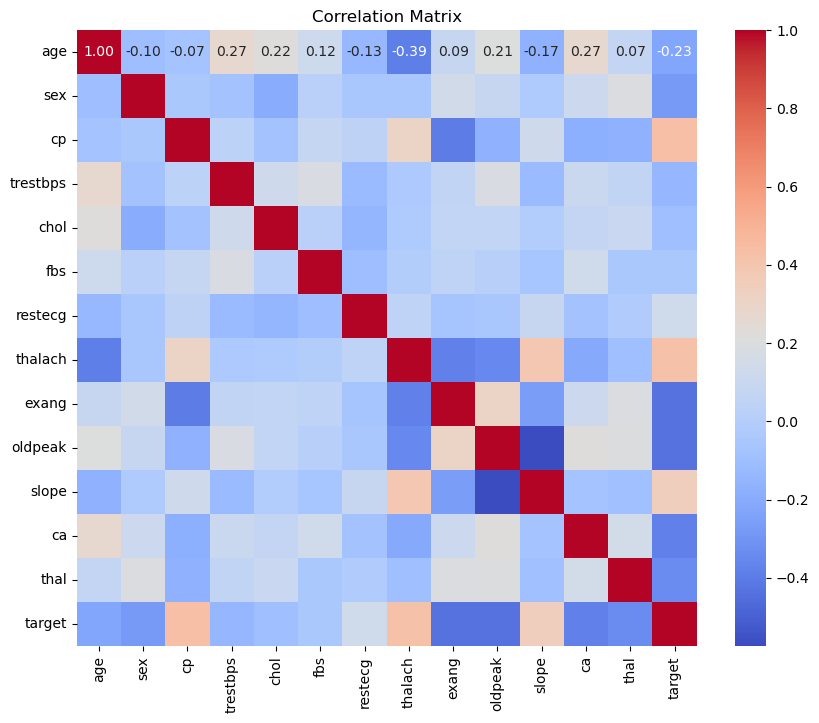

In [58]:
# 2. 상관관계 분석
# 상관계수 계산 및 시각화
corr_matrix = data.corr()  # 모든 변수 간의 상관계수 계산
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # 히트맵으로 시각화(상관관계를 색상으로 표시해 시각적)
plt.title("Correlation Matrix")
plt.show()

**히트맵의 시각적 해석**  
빨강: 타겟 변수(target)과 높은 양의 상관관계를 보이는 변수  
예: cp, thalach  
파랑: 타겟 변수와 높은 음의 상관관계를 보이는 변수  
예: exang, oldpeak  
흰색: 상관관계가 낮거나 없는 변수  
예: chol, fbs

In [59]:
# 상관계수 출력: 타겟과 각 변수 간 상관계수 정렬
print("\nCorrelation with Target (Heart Disease):")
print(corr_matrix['target'].sort_values(ascending=False))


Correlation with Target (Heart Disease):
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


**<주요 상관관계 해석>**

**높은 양의 상관관계(0.3이상)**  
cp (흉통 유형): 상관계수 0.43 → 타겟 변수와 강한 양의 상관관계  
thalach (최대 심박수): 상관계수 0.42 → 타겟 변수와 강한 양의 상관관계  
slope (ST 세그먼트 기울기): 상관계수 0.35 → 타겟 변수와 양의 상관관계  

**낮은 양의 상관관계 (0.1 이상, 0.3 미만):**  
restecg (심전도 결과): 상관계수 0.13 → 약한 양의 상관관계

**음의 상관관계:**  
exang (운동 유발 협심증 여부): 상관계수 -0.43 → 강한 음의 상관관계  
oldpeak (휴식 대비 ST 하강): 상관계수 -0.43 → 강한 음의 상관관계  
sex (성별): 상관계수 -0.28 → 타겟 변수와 약한 음의 상관관계  

**상관관계가 매우 낮거나 없는 변수:**  
fbs (공복 혈당): 상관계수 -0.04 → 거의 상관관계가 없음  
chol (콜레스테롤): 상관계수 -0.10 → 매우 낮은 상관관계



In [60]:
# 3. 입력값(특징) 선택
# 상관관계 분석 결과를 바탕으로 선택한 입력값만 사용
selected_features = ['age', 'sex', 'cp', 'exang', 'trestbps', 'thalach']
X = data[selected_features]  # 입력값
y = data['target']  # 출력값 (심장 질환 여부)

In [61]:
# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# 5. 데이터 전처리
# 연속형 데이터 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train[['age', 'trestbps', 'thalach']])
X_test_numerical = scaler.transform(X_test[['age', 'trestbps', 'thalach']])

# 범주형 데이터 변환 (OneHotEncoder)
encoder = OneHotEncoder(sparse_output=False)  # sparse 대신 sparse_output 사용
X_train_categorical = encoder.fit_transform(X_train[['sex', 'cp', 'exang']])
X_test_categorical = encoder.transform(X_test[['sex', 'cp', 'exang']])

# 전처리된 데이터를 결합
X_train_processed = np.hstack((X_train_numerical, X_train_categorical))
X_test_processed = np.hstack((X_test_numerical, X_test_categorical))


### **사용한 알고리즘 설명** : 랜덤 포레스트(Random Forest)

**선정 이유**  
높은 예측 성능: 비선형 데이터와 복잡한 관계를 효과적으로 학습  
**과적합 방지**  
여러 트리를 사용해 데이터에 과도하게 맞추는 문제를 완화  
**변수 중요도 계산**  
각 특징이 예측에 얼마나 기여했는지 평가 가능  
**유연성**  
연속형 및 범주형 변수를 동시에 처리 가능   


**매개변수 선택 근거**  
n_estimators=100 : 100개의 트리를 사용해 예측 안정성을 높임  
max_depth=10 : 트리의 최대 깊이를 10으로 제한해 과적합 방지  
min_samples_split=5 : 최소 샘플 수를 5로 설정해 신뢰도 있는 노드 분할 보장  
random_state=42 : 재현 가능성을 위해 랜덤 시드를 고정

In [63]:
# 6. 랜덤 포레스트 모델 생성
# RandomForestClassifier를 사용하여 심장 질환 예측 모델 생성
model = RandomForestClassifier(
    n_estimators=100,  # 트리 개수
    max_depth=10,  # 트리 최대 깊이 제한
    min_samples_split=5,  # 최소 샘플 분할 기준
    random_state=42
)

In [64]:
# 7. 모델 학습
model.fit(X_train_processed, y_train)
pass

In [65]:
# 8. 교차 검증 추가
cross_val_scores = cross_val_score(model, np.vstack((X_train_processed, X_test_processed)), np.hstack((y_train, y_test)), cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.97073171 0.99512195 0.9804878  0.97560976 0.97560976]
Mean Cross-Validation Accuracy: 0.9795121951219512


In [66]:
# 9. 모델 예측
y_pred = model.predict(X_test_processed)

### **모델 평가**

**훈련 데이터 정확도**  
모델이 훈련 데이터에서 얼마나 정확하게 예측했는지 측정  
**테스트 데이터 정확도**  
모델이 테스트 데이터에서 얼마나 정확하게 예측했는지 측정  
**재현율**  
실제 심장 질환이 있는 환자 중, 모델이 정확히 심장 질환이 있다고 예측한 비율(실제 양성을 얼마나 잘 찾아냈는지)  
**F1 점수**  
정밀도(Precision)와 재현율(Recall)의 조화 평균

In [67]:
# 10. 모델 평가
# 훈련 데이터 정확도 계산
train_accuracy = accuracy_score(y_train, model.predict(X_train_processed))
print(f"\nTraining Accuracy: {train_accuracy}")  # 훈련 데이터 정확도

# 테스트 데이터 성능 계산
test_accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 테스트 데이터 성능 출력
print("\nTest Model Performance:")
print(f"Test Accuracy: {test_accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Training Accuracy: 0.9951219512195122

Test Model Performance:
Test Accuracy: 0.975609756097561
Recall: 0.9514563106796117
F1 Score: 0.9751243781094527


In [71]:
# 11. 사용자 입력값으로 예측 수행
print("\n다음 정보를 입력해주세요:")

# 사용자 입력 받기
age = float(input("나이 (Age): "))
sex = int(input("성별 (남성: 1, 여성: 0): "))
cp = int(input("흉통 유형 (0: Typical, 1: Atypical, 2: Non-Anginal, 3: Asymptomatic): "))
exang = int(input("운동 유발 협심증 여부 (예: 1, 아니오: 0): "))
trestbps = float(input("안정 시 혈압 (mm Hg): "))
thalach = float(input("최대 심박수: "))

# 사용자 입력값을 데이터프레임으로 변환 (열 이름 포함)
new_input_df = pd.DataFrame({
    'age': [age],
    'trestbps': [trestbps],
    'thalach': [thalach],
    'sex': [sex],
    'cp': [cp],
    'exang': [exang]
})

# 사용자 입력값 전처리
new_input_numerical = scaler.transform(new_input_df[['age', 'trestbps', 'thalach']])
new_input_categorical = encoder.transform(new_input_df[['sex', 'cp', 'exang']])
new_input_processed = np.hstack((new_input_numerical, new_input_categorical))

# 사용자 입력값 예측
user_prediction = model.predict(new_input_processed)

# 예측 결과 출력
if user_prediction[0] == 1:
    print("예측 결과: 환자는 심장 질환이 있을 가능성이 높습니다.")
else:
    print("예측 결과: 환자는 심장 질환이 없을 가능성이 높습니다.")



다음 정보를 입력해주세요:


나이 (Age):  40
성별 (남성: 1, 여성: 0):  1
흉통 유형 (0: Typical, 1: Atypical, 2: Non-Anginal, 3: Asymptomatic):  1
운동 유발 협심증 여부 (예: 1, 아니오: 0):  1
안정 시 혈압 (mm Hg):  70
최대 심박수:  119


예측 결과: 환자는 심장 질환이 있을 가능성이 높습니다.


**EX) 사용자 입력 값을 넣은 후 실행결과**  
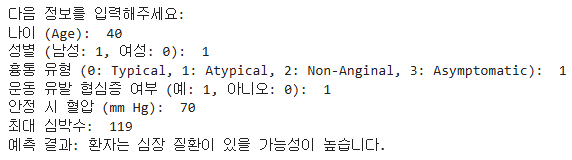

### **chatGPT사용**  

**심장질환 예측을 할 떄, 머신러닝 알고리즘은 어떤 걸 사용하는게 좋을까 ?**  


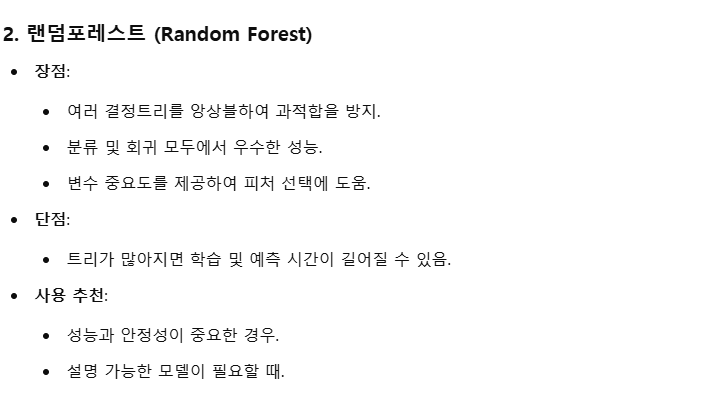
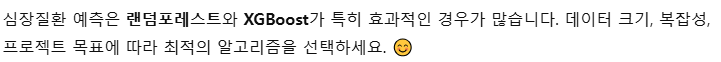

**랜덤포레스트를 사용할 떄. 매개변수 설정을 정하는데 도움 받고싶어 이유도 알려주라** 

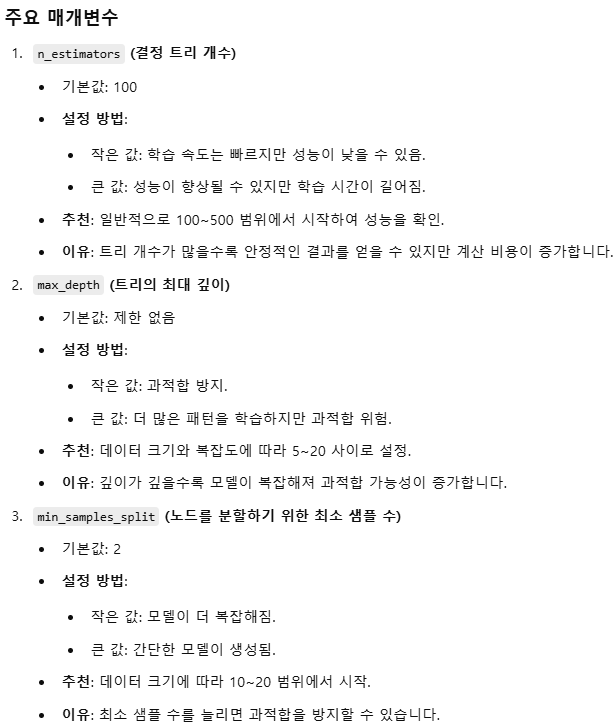

**chatGPT링크**  
https://chatgpt.com/share/6757f7e2-aac0-8002-9646-e3f1e00a0059